##  PCA Aanlysis to reduce dimensionality
the aim is to apply PCA and see if improves the results of our trainning model

-1 step load cleanning data 231018_clean_table_for_analysis.csv

-2 step create variable severe based on  grav

-3 step prepare and run PCA

-4 step to be done...(working in progress)

In [20]:
#Import libraires
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
# load Data
df = pd.read_csv("./data/231018_clean_table_for_analysis.csv", index_col=0, low_memory=False)

In [22]:
df.head(10)

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,choc,manv,date,is_holiday,holiday,actp,num_veh,hrmn,grav,etatp
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,3.0,11.0,2019-11-30,False,NaN,0,0,90,0,0
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,1.0,0.0,2019-11-30,False,NaN,0,0,170,3,0
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,0,0
201900000003,2.0,2,2,1930,9.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,3,0
201900000003,1.0,1,1,1995,9.0,-1.0,2019,11,28,1,...,4.0,2.0,2019-11-28,False,NaN,1,14,915,3,0
201900000003,1.0,1,1,1966,1.0,-1.0,2019,11,28,1,...,4.0,23.0,2019-11-28,False,NaN,1,27,915,0,0
201900000004,1.0,1,1,1993,0.0,-1.0,2019,11,30,5,...,4.0,23.0,2019-11-30,False,NaN,1,0,1220,0,0


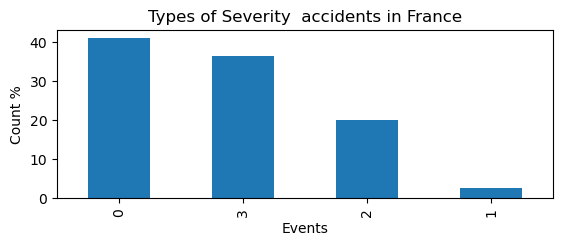

In [71]:
# checking the types of accidents based on their gravity 
import matplotlib.pyplot as plt
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))#, labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Types of Severity  accidents in France')
# Display the plot
plt.show()



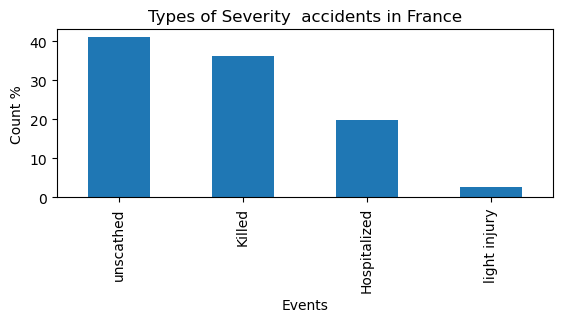

In [72]:
import matplotlib.pyplot as plt
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Types of Severity  accidents in France')
# Display the plot
plt.show()

In [73]:
import numpy as np
# create target variable
# create a new variable for the severity ['Grav'] of accidents ( Sereve, non-severe) as a possible target variable
#### 0 = non severe and 1 equal to severe
df['Severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)

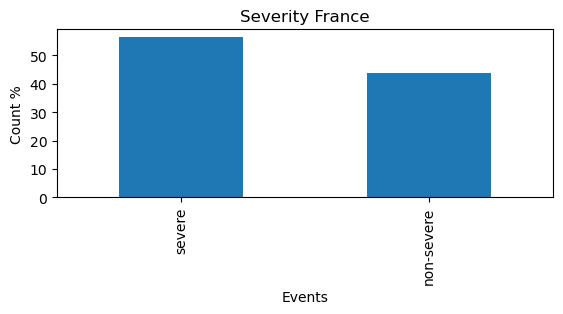

In [74]:
# exploring severe cases in % 
event_counts = df['Severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 40 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool

In [76]:
#df['date']= pd.to_datetime(df.date,format='%Y-%m-%d')
#dont use for PCA

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 40 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool

In [78]:
# drop holiday grav and date to split teh date and run the PCA
df = df.drop(['holiday','grav', 'date'], axis=1)

In [79]:
#split the data for modeling
# 2005 to 2019 for trainning  and 2020 to 2021 to test

# Filter the data for the training set (2005 to 2018)
train_data = df[(df['an'] >= 2005) & (df['an'] <= 2008)]

# Filter the data for the testing set (2019 and 2021)
test_data = df[(df['an'] == 2019) | (df['an'] == 2021)]

# Remove the target variable from the features and split 
X_train = train_data.drop(columns=['Severe'])  
y_train = train_data['Severe']  

X_test = test_data.drop(columns=['Severe'])  
y_test = test_data['Severe']  



## PCA reduction in the trainning data

In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of components for PCA
n_components = 25  # adjust this based on our  requirements need to test this

# Perform PCA on the standardized training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

In [94]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.10262253 0.06161109 0.04652022 0.04100745 0.03650043 0.03531368
 0.03441172 0.03293314 0.0311211  0.03023718 0.03007556 0.02958584
 0.02855105 0.02773533 0.02723002 0.0270483  0.02673386 0.02575391
 0.02521792 0.02492086]


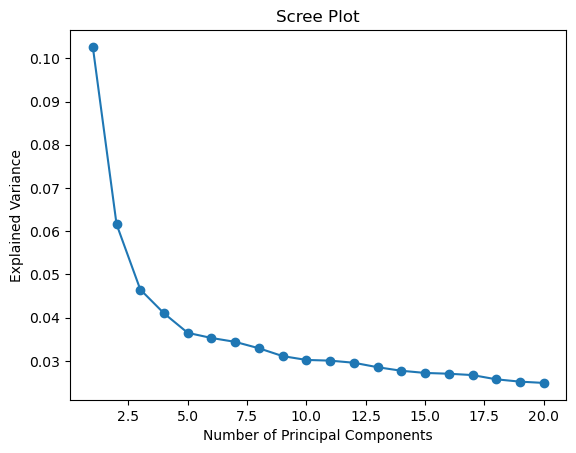

In [95]:
# plot the explined variance of the PCA in order to evaluate the number of components 
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [96]:
# Standardize the testing data using the same scaler used for training
X_test_scaled = scaler.transform(X_test)

# Apply the same PCA transformation on the testing data
X_test_pca = pca.transform(X_test_scaled)

## include your model here

In [97]:
# run the model: Randon Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

#make the predictions
y_pred = clf.predict(X_test_pca)

In [98]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)

# Display the accuracy score
print("[Random Forest Algorithm] Accuracy Score: {:.3f}".format(acc))

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", classification_rep)


[Random Forest Algorithm] Accuracy Score: 0.551
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.25      0.33    110905
           1       0.57      0.80      0.66    137489

    accuracy                           0.55    248394
   macro avg       0.53      0.52      0.50    248394
weighted avg       0.53      0.55      0.51    248394



In [99]:
from sklearn.metrics import confusion_matrix
#  confusion matrix
matrix = confusion_matrix(y_test, y_pred)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-severe', 'severe'], 
                         columns=['non-severe', 'severe'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
            non-severe  severe
non-severe       27264   83641
severe           27901  109588


In [100]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df.Severe.values
dataframe = pd.DataFrame(percentages, index=['non-severe', 'severe'], columns=['non-severe', 'severe'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
            non-severe     severe
non-severe   10.976111  33.672714
severe       11.232558  44.118618
